# Taller - Introducción a Python

**Juan Esteban Pineda Lopera**

**C.C 1001248691**

Primero, se importan las librerias necesarias

In [2]:
import numpy as np
import matplotlib.pyplot as plt

1. Crear  dos  vectores,  A  y  B,  aleatorios  enteros  (puede  usar  la  función  `np.random.randint`)  con dimensiones 1 x 4.  Crear una matriz con las siguientes consideraciones:
    - Columna 1: Suma de los vectores A y B 
    - Columna 2: Multiplicación de A y B 
    - Columna 3: Vector A al cuadrado 
    - Columna 4: Vector B al cuadrado

In [3]:
# Creación de los vectores aleatorios enteros
A = np.random.randint(0, 100, size=(1, 4))
B = np.random.randint(0, 100, size=(1, 4))
print(f'''
Vector A: {A}
Vector B: {B}
''')

# Suma de los vectores
C = A + B
print(f'''
Suma de los vectores A y B: {C}
''')

# Multiplicación de A y B
D = A * B
print(f'''
Multiplicación de los vectores A y B: {D}
''')

# Vector A al cuadrado
E = A ** 2
print(f'''
Vector A al cuadrado: {E}
''')

# Vector B al cuadrado
F = B ** 2
print(f'''
Vector B al cuadrado: {F}
''')


Vector A: [[58 30  8 99]]
Vector B: [[24 23 91 10]]


Suma de los vectores A y B: [[ 82  53  99 109]]


Multiplicación de los vectores A y B: [[1392  690  728  990]]


Vector A al cuadrado: [[3364  900   64 9801]]


Vector B al cuadrado: [[ 576  529 8281  100]]



2. Sean los vectores `X = [2 6 8 9 0 1 8]`, `Y = [0 1 3 6 4 2 7]`
    - Calcular el valor máximo y mínimo de cada vector e indicar la posición de dicho valor.
    - Crear un vector N en el que cada elemento *i* corresponderá al valor presentado en la tabla según la relación de los elementos de X e Y.
    - Encontrar la posición de los valores nulos en cada vector y reemplazar por el número de la posición encontrada.

<div style="margin-left: auto;
            margin-right: auto;
            width: 30%">

| **Relación**     |**N(*i*)**| 
|:----------------:|---------:|
| X(*i*) = Y(*i*)  |  0       |                  
| X(*i*) > Y(*i*)  |  1       |     
| X(*i*) < Y(*i*)  | -1       | 

</div>          

    

In [4]:
# Definiendo los vectores
X = np.array([2, 6, 8, 9, 0, 1, 8], dtype=int)
Y = np.array([0, 1, 3, 6, 4, 2, 7], dtype=int)

# Calcular el valor máximo y mínimo de los vectores
max_X = np.argmax(X)
min_X = np.argmin(X)
max_Y = np.argmax(Y)
min_Y = np.argmin(Y)

print(f'''
Valor máximo de X: {X[max_X]}, en la {max_X + 1}º posición 
Valor mínimo de X: {X[min_X]}, en la {min_X + 1}º posición 
Valor máximo de Y: {Y[max_Y]}, en la {max_Y + 1}º posición 
Valor mínimo de Y: {Y[min_Y]}, en la {min_Y + 1}º posición 
''')

# Creación del vector N
def vector_N(x, y):
    n = np.array([], dtype=int)
    for i in range(len(x)):
        if x[i] == y[i]:
            n = np.append(n, int(0))
        elif x[i] < y[i]:
            n = np.append(n, int(-1))
        elif x[i] > y[i]:
            n = np.append(n, int(1))
    return n

N = vector_N(X, Y)
print(f'''
Vector N: {N}
''')

def null_find(x):
    nulls = np.where(x == 0)
    x[nulls] = [null + 1 for null in nulls]

null_find(X)
null_find(Y)

print(f'''
Vector X sin valores nulos: {X}
Vector Y sin valores nulos: {Y}''')


Valor máximo de X: 9, en la 4º posición 
Valor mínimo de X: 0, en la 5º posición 
Valor máximo de Y: 7, en la 7º posición 
Valor mínimo de Y: 0, en la 1º posición 


Vector N: [ 1  1  1  1 -1 -1  1]


Vector X sin valores nulos: [2 6 8 9 5 1 8]
Vector Y sin valores nulos: [1 1 3 6 4 2 7]


3. Crear la gráfica que se muestra en la Figura 1 mediante una **función** que contenga como parámetros de entrada el periodo de muestreo, el tiempo final, la amplitud y la frecuencia de la señal. La función debe guardar la imagen generada; para esto, consulte la función `plt.savefig()`.

<div style="text-align: center;">

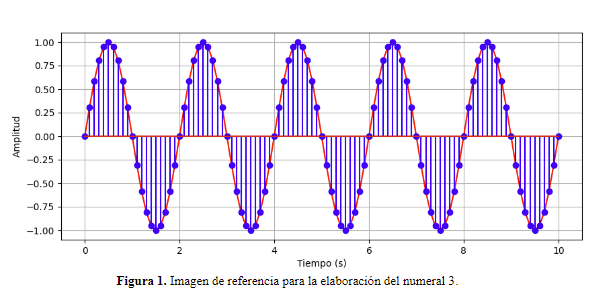
</div>


In [5]:
def graphicate(T, time, ampl, frec):
    '''
    Parámetros:
        T: Periodo de muestréo.
        t: Tiempo final.
        ampl: Amplitud de la señal.
        frec: frecuencia de la señal.
    '''
    t = np.linspace(0, time, T)
    s = ampl * np.sin(2 * np.pi * frec * t)

    plt.figure(figsize=(10,6))

    plt.plot(t, np.zeros(T), color='red', zorder=1) # Linea central
    plt.plot(t, s, color='red', zorder=1)           # Señal sinusoidal
    plt.scatter(t, s, color='blue', zorder=2)       # Puntos de datos
    
    
    for value in np.arange(0, T):
        plt.vlines(t[value], ymin=0, ymax=s[value], color='blue') # Distancia dato-origen

    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.savefig(f'fs={T}_t={time}_ampl={ampl}_i={frec}.png')

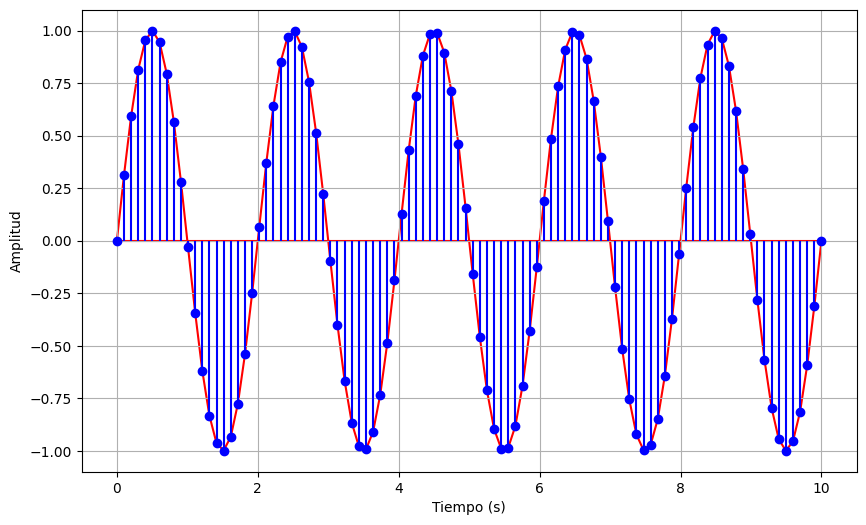

In [6]:
graphicate(100, 10, 1, 1/2)

4. Crear un código con el que se obtenga la Figura 2 y que ésta se guarde automaticamente.
<div style="text-align: center;">

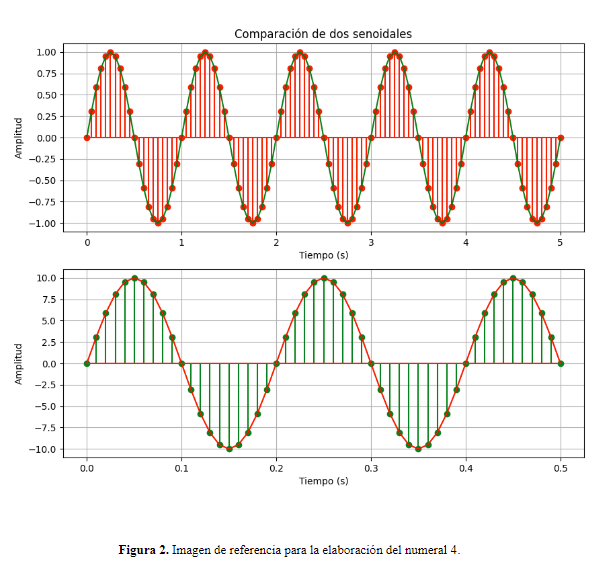
</div>

In [ ]:
def graphicate(T, time, ampl, frec, color_1, color_2, thickness, theta):
    '''
    Función que gráfica una función senoidal dadas sus características.
    Requiere previamente una función de figure y, de ser necesario, subplot.
    Requiere posteriormente una función para mostrar o guardar la figura.

    Parámetros:
        T: Periodo de muestréo.
        t: Tiempo final.
        ampl: Amplitud de la señal.
        frec: Frecuencia de la señal.
        color_1: Color de la señal continua.
        color_2: Color de los puntos de muestréo.
        thickness: Grosor de la señal continua.
        theta: Desfase de la señal.
    '''
    t = np.linspace(0, time, T)
    s = ampl * np.sin(2 * np.pi * frec * t + theta)

    plt.plot(t, np.zeros(T), color=color_1, zorder=1, linewidth=thickness) # Linea central
    plt.plot(t, s, color=color_1, zorder=1, linewidth=thickness)           # Señal sinusoidal
    plt.scatter(t, s, color=color_2, zorder=2)                         # Puntos de datos
    
    
    for value in np.arange(0, T):
        plt.vlines(t[value], ymin=0, ymax=s[value], color=color_2)     # Distancia dato-origen

    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)

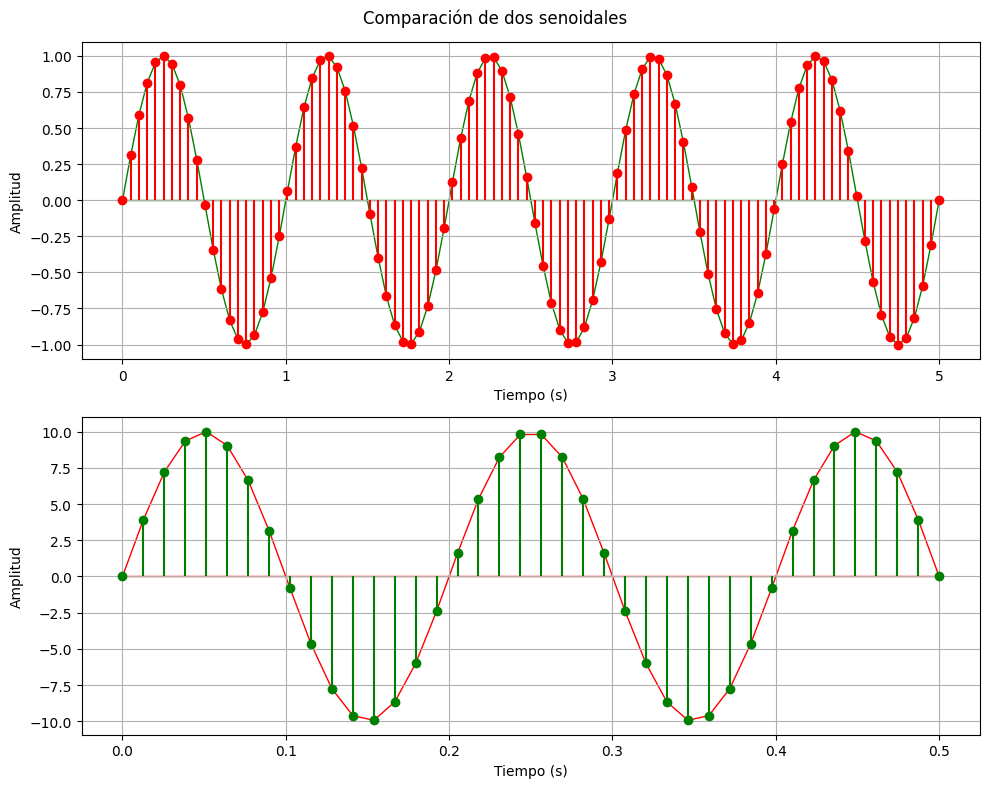

In [8]:
plt.figure(figsize=(10,8))
plt.suptitle('Comparación de dos senoidales')

plt.subplot(2,1,1)
graphicate(100, 5, 1, 1, 'green', 'red', 1, 0)
plt.tight_layout()

plt.subplot(2,1,2)
graphicate(40, 0.5, 10, 1/0.2, 'red', 'green', 1, 0)
plt.tight_layout()

plt.savefig('comparacion_senoidales.png')

5. Utilizar un ciclo `for` para obtener la Figura 3. Todos los colores deben ser aleatorios.

<div style="text-align: center;">

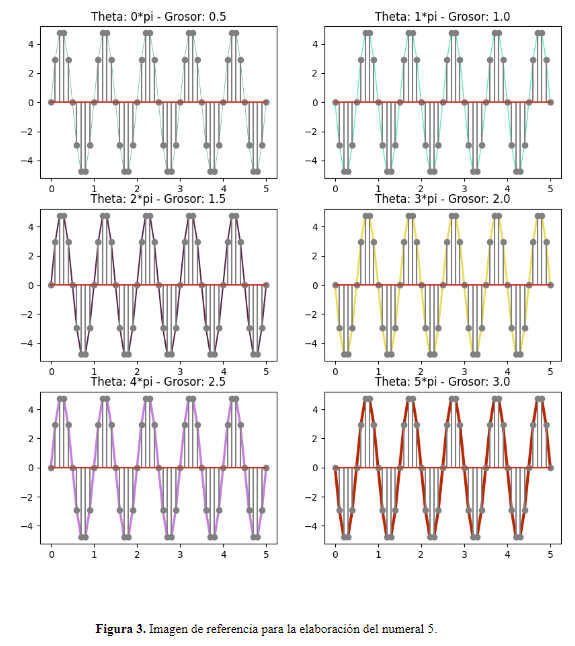
</div>

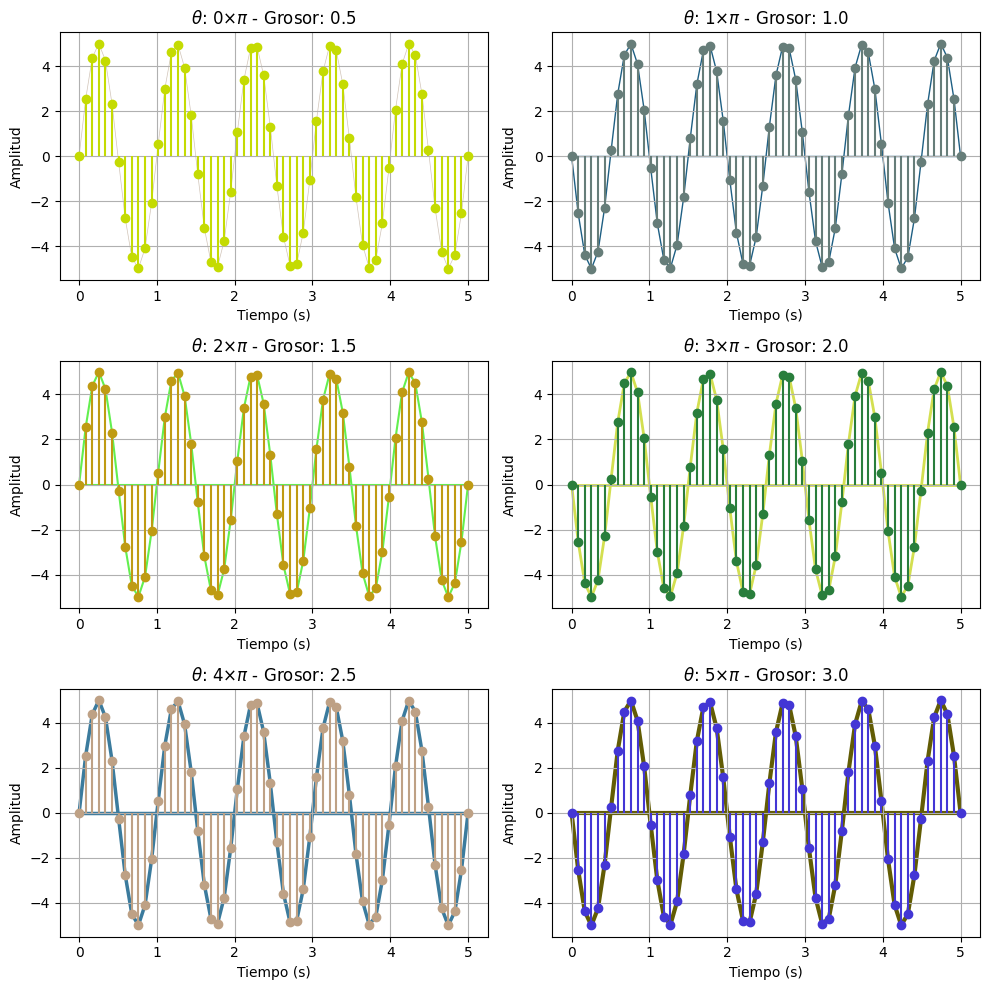

In [9]:
plt.figure(figsize=(10,10))

for i in range(0, 6, 1):
    random_color_1 = np.random.choice(range(256), size=3) / 255.0
    random_color_2 = np.random.choice(range(256), size=3) / 255.0
    plt.subplot(3, 2, i + 1)
    graphicate(60, 5, 5, 1, random_color_1, random_color_2, (i/2) + 0.5, i * np.pi)
    plt.title(fr'$\theta$: {i}$\times \pi$ - Grosor: {(i / 2) + 0.5}')
    plt.tight_layout()

plt.show()

6. Crear una función que tenga como parámetro de entrada una matriz de 2 columnas: La primera el vector de tiempo (variable independiente) y la segunda contiene los datos de amplitud (variable dependiente). La función debe:
    - Graficar los datos (variable independiente vs dependiente).
    - Retornar el valor promedio de la variable dependiente.

In [10]:
def function(matrix):
    '''
    Parámetros
        matrix: Matriz de 2 columnas (tiempo vs amplitud)
    '''

    matrix = matrix.T # Transpuesta de la matriz ingresada

    # Graficar los datos
    plt.figure(figsize=(15,6))
    plt.plot(matrix[0], matrix[1], color='black')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.xlim(np.min(matrix[0]), np.max(matrix[0]))
    plt.grid(True)
    plt.show()

    # Retornar el valor promedio de la variable dependiente
    return np.average(matrix[1])

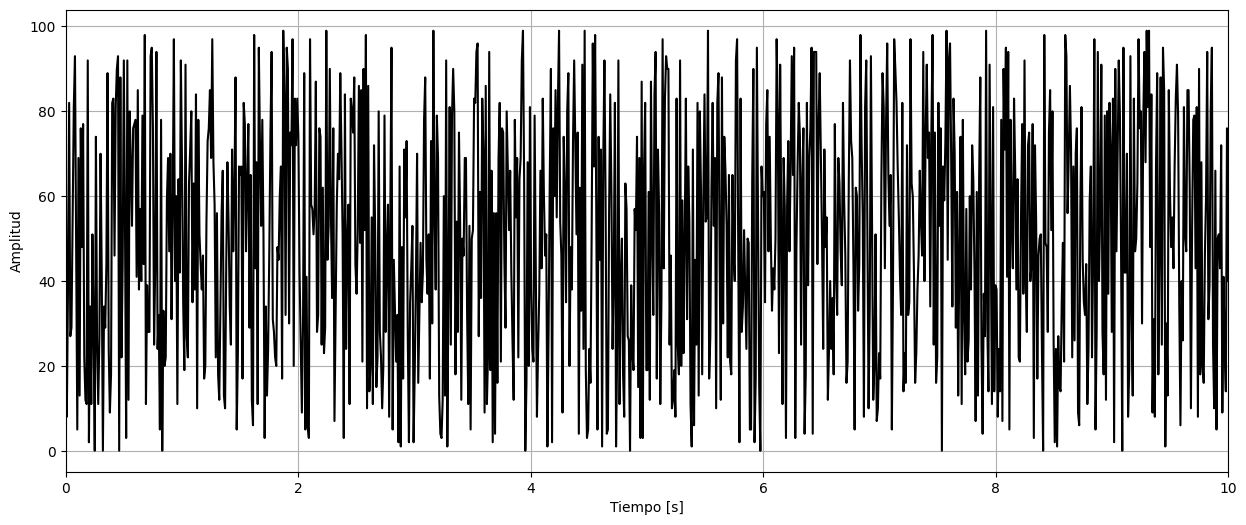

El valor promedio es: 49.966


In [11]:
time = np.linspace(0, 10, 1000)
amplitude = np.random.randint(0, 100, 1000)

matrix = np.column_stack((time, amplitude))

average = function(matrix)
print(f'El valor promedio es: {average}')

7. Sea x = [0, $\pi$/2, 2 $\pi$], construir una matriz cuya primera fila es x, la segunda es el seno de cada entrada de x y la tercera fila el coseno de cada entrada de x. Verificar que la matriz final tenga dimensiones de 3x3.

In [12]:
x = [0, np.pi / 2, 2 * np.pi]
x_sin = np.sin(x)
x_cos = np.cos(x)

matrix = np.vstack([x, x_sin, x_cos])
print(f'La forma final de la matriz es: {matrix.shape[0]} x {matrix.shape[1]}')

La forma final de la matriz es: 3 x 3


8. Encontrar los valores de la pendiente e intercepto mediante el ajuste lineal de los puntos X e Y:

`X = [0, 2, 5, 7, 15]` `Y = [3, 7, 10, 15, 26]`

Graficar X vs. Y como una nube de puntos en conjunto con la recta encontrada (Ver Figura 4 como referencia).

*Nota: usar la función* `np.polyfit`

<div style="text-align: center;">

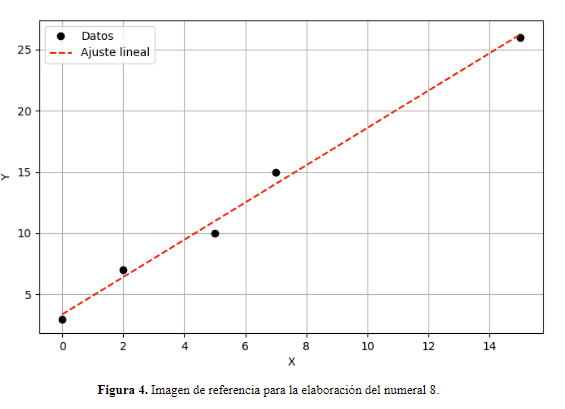
</div>


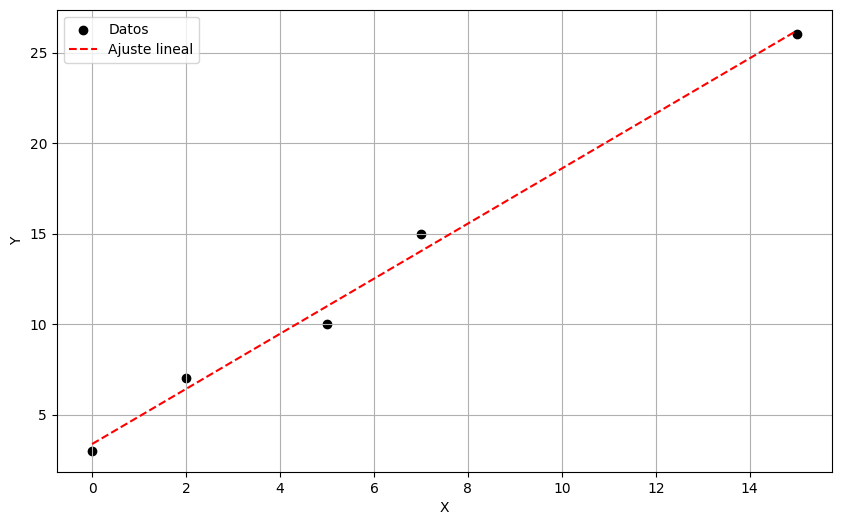

In [81]:
X = [0, 2, 5, 7, 15]
Y = [3, 7, 10, 15, 26]

m, b = np.polyfit(X, Y, deg=1)
x = np.linspace(0, 15, 100)
lineal_fit = m * x + b

plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='black', label='Datos')
plt.plot(x, lineal_fit, linestyle='dashed', color='red', label='Ajuste lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

9. Crear una función llamada `curvaty` que realice las siguientes operaciones:
    - Definir un vector *t* que inicie en -4, finalice en 4 y tenga un paso *$T_m$*.
    - Definir un vector *y* a partir de la siguiente expresión: $y = e^{-2t} + A \sin(2\pi ft + \theta)$
    - Graficar *t* vs *y* usando equis rojas y rejilla. Recuerde que todo gráfico debe tener ejes y título

Adicionalmente, responda:
- ¿Cuáles son los parámetros de entrada y salida de la función?

    Parámetros de entrada:
    - **$T_m$**: El paso entre cada dato para formar el vector *t*.
    - **A**: Amplitud de la parte senoidal de la expresión que forma el vector *y*.
    - **f**: Frecuencia de la parte senoidal de la expresión que forma el vector *y*.
    - **theta**: Traslación o desfase de la parte senoidal de la expresión que forma el vector *y*.

- ¿Cuál es la diferencia entre la frecuencia de muestréo y la frecuencia de la función seno? ¿Donde se ven reflejadas en el código?

La frecuencia de muestréo representa la cantidad de datos por unidad de la variable independiente, mientras que la frecuencia de la función seno informa sobre 
cuantas veces se repite la función durante un ciclo de 360º o 2$\pi$.

La primera se representa en el código indirectamente con el parámetro **$T_m$**; el paso es proporcional a la frecuencia de muestréo, concretamente, se puede obtener la frecuencia de muestréo como su inverso: $F_m = \frac{1}{T_m}$. La frecuencia de la función seno está presente con el parámetro **f**.

In [14]:
def curvaty(Tm, A, f, theta):
    t = np.arange(-4, 4, Tm)
    y = np.e**(-2*t) + A*np.sin(2*np.pi*f*t + theta)

    plt.figure(figsize=(10,6))
    plt.title(r'$y = e^{-2t} + A \sin(2 \pi f t + \theta)$')
    plt.scatter(t, y, marker='x', color='red', label=fr'''Amplitud = {A} 
Frecuencia = {f} 
$\theta$ = {theta}''')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

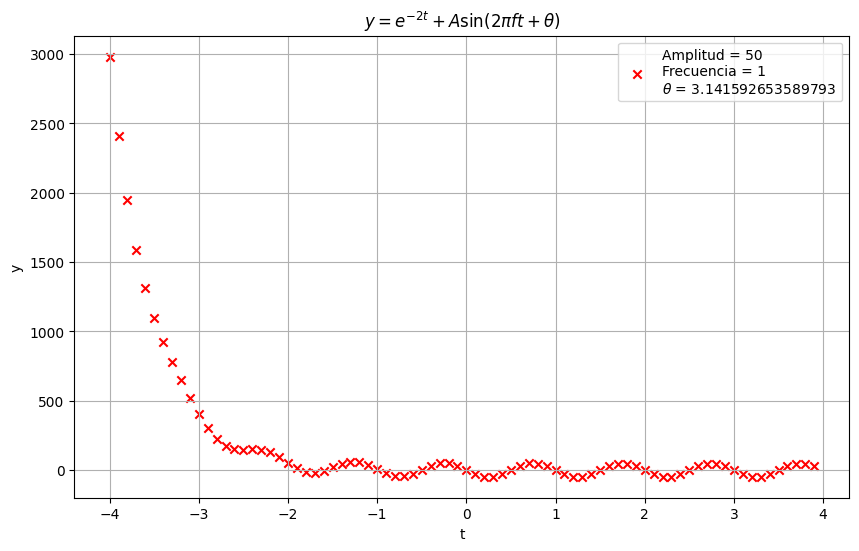

In [15]:
curvaty(0.1, 50, 1, np.pi)

10. Crear dos vectores aleatorios de 1 a 100, con un tamaño de 1000 valores cada uno, y realizar las siguientes actividades.
    - Hallar el coeficiente de correlación entre ambos vectrores usando la función `np.corrcoef`.
    - Halle el ajuste lineal entre ambos vectores, donde la variable independiente es el vector 1 y la variable dependiente el vector 2.
    - Grafique el vector 1 vs. el vector 2 como una nube de puntos y agregue la línea de la regresión obtenida.
    - Encuentre el error entre ambos vectores usando la siguiente expresión:
    $J = \frac{1}{N} \sum_{i=1}^N vector1(i) - vector2(i)$
    
        Deduzca el significado de las variables N e i en la expresión.
    
En la expresión, *N* representa el número de datos en cada vector, mientras que *i* es el componente sobre el que se itera en la suma. Por esto, la expresión representa una suma desde 1 hasta el último dato de la resta de los datos de cada vector.


El coeficiente de relación entre los dos vectores es -0.007005130491344225


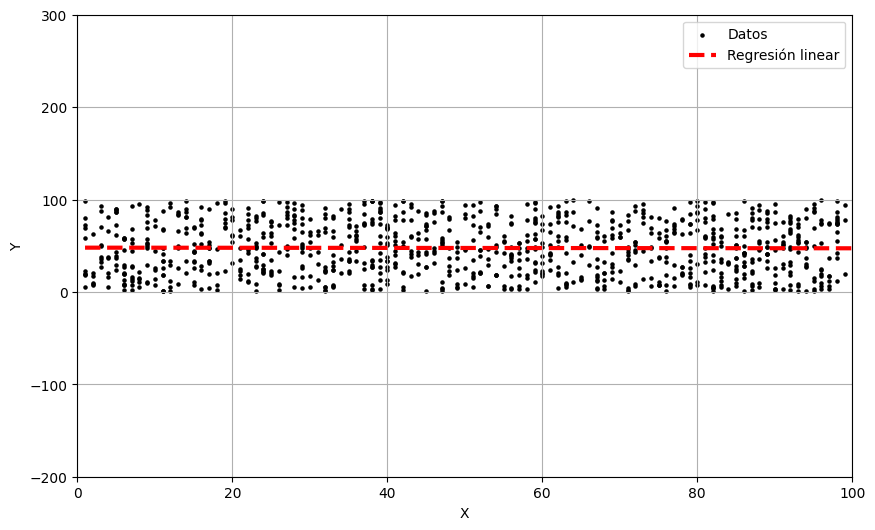

El error entre ambos vectores es 3.456


In [180]:
N = 1000

vector_1 = np.random.randint(1, 100, size=N)
vector_2 = np.random.randint(1, 100, size=N)

corr_coef = np.corrcoef(vector_1, vector_2)
print(f'El coeficiente de relación entre los dos vectores es {corr_coef[0, 1]}')

m, b = np.polyfit(vector_1, vector_2, deg=1)
x = np.linspace(1, 100, N)
lineal_fit = m * x + b

plt.figure(figsize=(10,6))
plt.scatter(vector_1, vector_2, color='black', s=5,label='Datos')
plt.plot(x, lineal_fit, color='red', linestyle='dashed', linewidth=3, label='Regresión linear')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-200, 300)
plt.xlim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

j = (1 / N) * np.sum((vector_1 - vector_2))
print(f'El error entre ambos vectores es {j}')

11. Elaborar el código con el que se generó la Figura 5. Para esto, puede asumir un periodo de muestréo de 0.05 segundos.

<div style="text-align: center;">

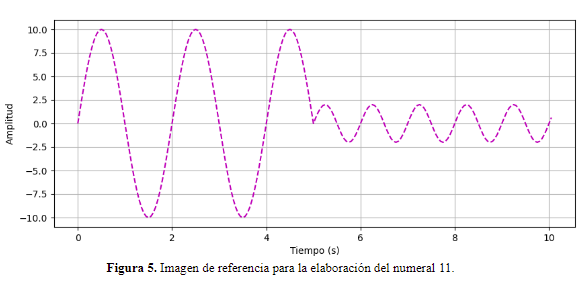
</div>

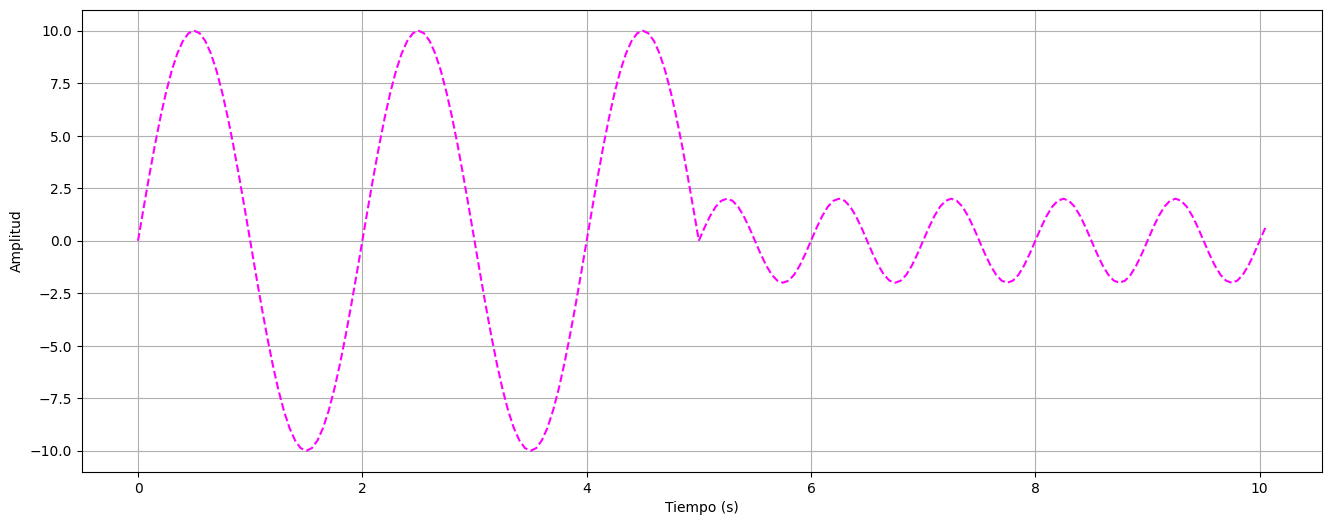

In [179]:
Tm = 0.05

amplitude_1 = 10
freq_1 = np.pi
t_1 = np.arange(0, 5.05, Tm)

amplitude_2 = 2
freq_2 = 2 * np.pi
t_2 = np.arange(5, 10.05, Tm)

plt.figure(figsize=(16,6))
plt.plot(t_1, amplitude_1 * np.sin(t_1 * freq_1), linestyle='dashed', color='magenta')
plt.plot(t_2, amplitude_2 * np.sin(t_2 * freq_2), linestyle='dashed', color='magenta')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()